<a href="https://colab.research.google.com/github/sakuronohana/my_datascience/blob/master/udemy/mlaz/Part%209%20-%20Dimensionality%20Reduction/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

Dimensionalitätsreduktion ist ganz einfach der Prozess der Reduzierung der Dimension eines Merkmalssatzes. Ihr Merkmalssatz könnte aus einem Datensatz mit hundert Spalten (d.h. Merkmalen) bestehen, oder es könnte eine Anordnung von Punkten sein, die eine große Kugel im dreidimensionalen Raum bilden. Dimensionalitätsreduktion bedeutet, die Anzahl der Spalten auf z.B. zwanzig zu reduzieren oder die Kugel im zweidimensionalen Raum in einen Kreis umzuwandeln.
Das ist alles schön und gut, aber warum sollten wir uns darum kümmern? Warum sollten wir 80 Spalten aus unserem Datensatz herausnehmen, wenn wir ihn direkt in unseren Algorithmus für maschinelles Lernen eingeben und den Rest von ihm erledigen lassen könnten?

## Der Fluch der Dimensionalität
Wir kümmern uns darum, weil der Fluch der Dimensionalität uns dazu zwingt. Der Fluch der Dimensionalität bezieht sich auf all die Probleme, die bei der Arbeit mit Daten in den höheren Dimensionen auftreten, die in den unteren Dimensionen nicht existierten.
Wenn die Anzahl der Merkmale zunimmt, nimmt auch die Anzahl der Stichproben proportional zu. Je mehr Merkmale wir haben, desto mehr Stichproben werden wir benötigen, damit alle Kombinationen von Merkmalswerten in unserer Stichprobe gut repräsentiert sind.

## Methoden zur Reduktion von Dimensionalitäten
Es gibt die folgenden zwei Methoden:

### Feature Selection
Bei dieser Methode geht es darum die relevantesten Merkmale zur Lösung eines Problemes zu finden. Haben wir wenige Merkmale, dann können wir meist selber die wichtigisten Merkmale find. Besteht der Datensatz aber aus 20, 50, 100 oder gar 1000 Merkmalen dann wird es für uns schwierig und wir benötigen ein Modell welche für uns die wesentlichsten Merkmale selektioniert.

### Feature Extraction 
Das Ziel dieser Methode ist es neue Merkmale zu finden. Wir befinden uns hier somit im Unsupervised Learning. Der Algorithmus transformiert hierbei die Daten von einem höheren dimensionalen Raum in einen tieferen Raum.

Nachfolgend werden folgenden Techniken zur Extraktion vorgestellt:

* Principal Component Analysis (PCA)
* Linear Discriminant Analysis (LDA)
* Kernel PCA
* Quadratic Discriminant Analysis (QDA)

## Principal Component Analysis (PCA)
Eine der Wohl am bekanntesten und beliebtesten DR-Methoden ist die PCA (dt. Hauptkomponentenanalyse). Die Hauptkomponentenanalyse (Principal Component Analysis, PCA) ist eine Methode zur Reduzierung der Dimensionalität, die häufig zur Reduzierung der Dimensionalität großer Datensätze verwendet wird, indem ein großer Satz von Variablen in einen kleineren transformiert wird, der immer noch die meisten Informationen des großen Satzes enthält.

Die Reduzierung der Anzahl der Variablen eines Datensatzes geht natürlich auf Kosten der Genauigkeit, aber der Trick bei der Dimensionalitätsreduktion besteht darin, ein wenig Genauigkeit gegen Einfachheit einzutauschen. Denn kleinere Datensätze lassen sich leichter untersuchen und visualisieren und machen die Datenanalyse für Algorithmen des maschinellen Lernens viel einfacher und schneller, ohne dass Fremdvariablen verarbeitet werden müssen.

**Zusammenfassend lässt sich also sagen, dass die Idee der PCA einfach ist - die Anzahl der Variablen eines Datensatzes zu reduzieren und gleichzeitig so viele Informationen wie möglich zu erhalten**

Ein gute Erklärung findet man hier:

https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Nachfolgend machen wir nun ein praktische Beispiel einer PCA.


### Importing the libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

Der Datensatz bezieht sich auf die Eigenschaften von Weinen.

In [54]:
datloc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/udemy/mlaz/Part%209%20-%20Dimensionality%20Reduction/Section%2043%20-%20Principal%20Component%20Analysis%20(PCA)/Python/Wine.csv'
dataset = pd.read_csv(datloc)

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

### Splitting the dataset into the Training set and Test set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [56]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))


(142, 13)
(142,)
(36, 13)
(36,)


### Feature Scaling

Wenn wir PCA anwenden, dann müssen wir eine Skalierung der Daten durchführen.

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA
Im nachfolgenden Beispiel werden wir nun Feature Extraction durchführen, also mit Hilfe von PCA neue Features finden. Wenn wir PCA einsetzen, dann stellt sich uns irgendwann die Frage, wieviel Komponenten (Dimensionen) wir mittels PCA extrahieren wollen. Grundsätzlich ist unser optimales Ziel eine 2D bzw. 2 Hauptkomponenten oder 95% der abzudeckenden Varianz. 

Im nachfolgenden Bild werden zwei Hauptkomponenten durch PCA bestimmt. Grün ist dabei die 1.Hauptkomponente und Lila die 2.Hauptkomponente. 

<img src='https://www.visiondummy.com/wp-content/uploads/2014/05/correlated_2d.png'>

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # oder Varianzabdeckung von 95% (0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print ('Der 1.Hauptkomponent hat eine Varianz von',pca.explained_variance_ratio_[0])
print ('Der 2.Hauptkomponent hat eine Varianz von',pca.explained_variance_ratio_[1])
print ('Beide Hauptkomponenten zusammen ergeben',int(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100,'%')

Der 1.Hauptkomponent hat eine Varianz von 0.3688410929485785
Der 2.Hauptkomponent hat eine Varianz von 0.1931839429741525
Beide Hauptkomponenten zusammen ergeben 0 %


### Training the Logistic Regression model on the Training set

In [59]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Making the Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

### Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


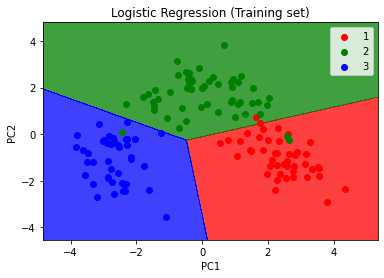

In [61]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


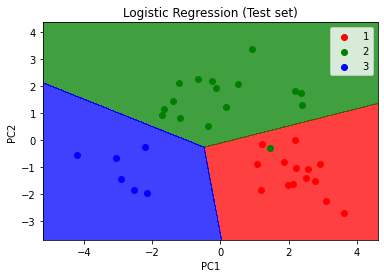

In [62]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Kernel PCA

Die PCA ist eine lineare Methode. Das heißt, sie kann nur auf Datensätze angewendet werden, die linear trennbar sind. Sie eignet sich hervorragend für Datensätze, die linear trennbar sind. Wenn wir sie jedoch auf nicht-lineare Datensätze anwenden, könnten wir ein Ergebnis erhalten, das möglicherweise nicht die optimale Dimensionalitätsreduktion darstellt. Kernel PCA verwendet eine Kernfunktion, um den Datensatz in einen höherdimensionalen Merkmalsraum zu projizieren, wo er linear trennbar ist. Dies ähnelt der Idee der [Support-Vektor-Maschine](https://github.com/sakuronohana/my_datascience/blob/master/udemy/mlaz/Part%203%20-%20Classification/Section%2017%20-%20Kernel%20SVM/Python/kernel_svm.ipynb).

Nachfolgend machen wir nun ein praktisches Beispiel einer PCA Kernel.

### Importing the libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

Der Datensatz bezieht sich auf die Eigenschaften von Weinen.

In [44]:
datloc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/udemy/mlaz/Part%209%20-%20Dimensionality%20Reduction/Section%2043%20-%20Principal%20Component%20Analysis%20(PCA)/Python/Wine.csv'
dataset = pd.read_csv(datloc)

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

### Splitting the dataset into the Training set and Test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [46]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))


(142, 13)
(142,)
(36, 13)
(36,)


### Feature Scaling

Wenn wir PCA anwenden, dann müssen wir eine Skalierung der Daten durchführen.

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying Kernel PCA


In [48]:
from sklearn.decomposition import KernelPCA as KPCA
kpca = KPCA(n_components=2, kernel = 'rbf') # Radial basis function kernel
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

print ('Der 1.Hauptkomponent hat eine Varianz von',pca.explained_variance_ratio_[0])
print ('Der 2.Hauptkomponent hat eine Varianz von',pca.explained_variance_ratio_[1])
print ('Beide Hauptkomponenten zusammen ergeben',int(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100,'%')

Der 1.Hauptkomponent hat eine Varianz von 0.3688410929485785
Der 2.Hauptkomponent hat eine Varianz von 0.1931839429741525
Beide Hauptkomponenten zusammen ergeben 0 %


### Training the Logistic Regression model on the Training set

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Making the Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

### Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


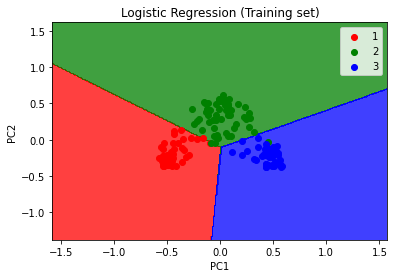

In [51]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


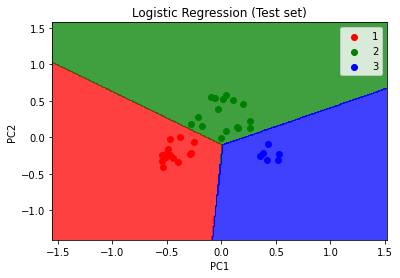

In [52]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Linear Discriminant Analysis (LDA)

Grundsätzlich funktionert LDA wie PCA mit den Unterschied, dass LDA an den Achsen interessiert ist, welche die maximale Klassentrennbarkeit zeigen. LDA ist im Gegensatz zu PCA ein Supervised Algorithmus wegen seiner Beziehung zur abhängigen Variable.

<img src='https://sebastianraschka.com/images/faq/lda-vs-pca/lda.png' width=300>

Unterschied wird auf diesem [Link](https://sebastianraschka.com/faq/docs/lda-vs-pca.html#:~:text=Both%20LDA%20and%20PCA%20are,unsupervised%20%E2%80%93%20PCA%20ignores%20class%20labels.&text=In%20contrast%20to%20PCA%2C%20LDA,discriminant%20in%20the%20figure%20above) im Detail erklärt.

Nachfolgend machen wir nun ein praktisches Beispiel einer LDA.

### Importing the libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

Der Datensatz bezieht sich auf die Eigenschaften von Weinen.

In [33]:
datloc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/udemy/mlaz/Part%209%20-%20Dimensionality%20Reduction/Section%2043%20-%20Principal%20Component%20Analysis%20(PCA)/Python/Wine.csv'
dataset = pd.read_csv(datloc)

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

### Splitting the dataset into the Training set and Test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [35]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))


(142, 13)
(142,)
(36, 13)
(36,)


### Feature Scaling

Wenn wir PCA anwenden, dann müssen wir eine Skalierung der Daten durchführen.

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying LDA


In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
# Im Gegensatz zu PCA müssen wir bei der Fit Transform im LDA auch die 
# abhängige Variable angeben.
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

### Training the Logistic Regression model on the Training set

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Making the Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

### Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


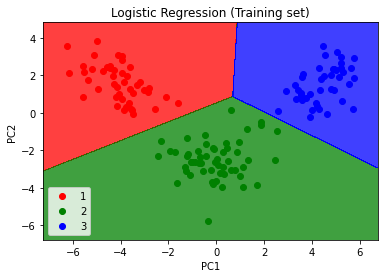

In [40]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


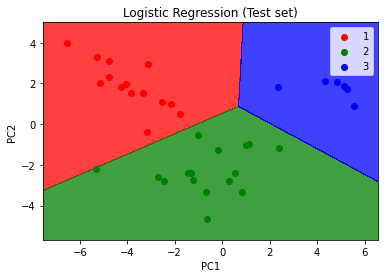

In [41]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()